In [1]:
# 1. Loading and Preprocessing 

# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('CarPrice_Assignment.csv')

# Display first few rows
data.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# Drop 'car_ID' as it's just an index
data.drop('car_ID', axis=1, inplace=True)

# Drop 'CarName' (not a technical feature)
data.drop('CarName', axis=1, inplace=True)

# Identify categorical columns
cat_cols = data.select_dtypes(include='object').columns
print('Categorical Columns:', cat_cols.tolist())

# Convert categorical columns to numeric using Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

# Check the cleaned dataset
data.head()


Categorical Columns: ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,0,1,0,2,0,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,1,0,2,0,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,1,2,2,0,94.5,171.2,65.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,0,0,3,1,0,99.8,176.6,66.2,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,0,0,3,0,0,99.4,176.6,66.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
# 2. Model Implementation 

# Split into features and target
X = data.drop('price', axis=1)
y = data['price']

# Split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Import models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}

# Train and predict
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    predictions[name] = preds


In [7]:
# 3. Model Evaluation 

# Import evaluation metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Evaluate each model
results = []
for name, preds in predictions.items():
    r2 = r2_score(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    results.append({'Model': name, 'R2 Score': r2, 'MSE': mse, 'MAE': mae})

# Create a results DataFrame
results_df = pd.DataFrame(results)
results_df


,Model,R2 Score,MSE,MAE
0,Linear Regression,0.798384,1.591639e+07,2526.407450
1,Decision Tree,0.900245,7.875099e+06,1939.138220
2,Random Forest,0.957860,3.326665e+06,1291.502675
3,Gradient Boosting,0.927542,5.720110e+06,1667.525102
4,Support Vector Regressor,-0.101953,8.699262e+07,5707.032482


<Axes: title={'center': 'Feature Importance'}>

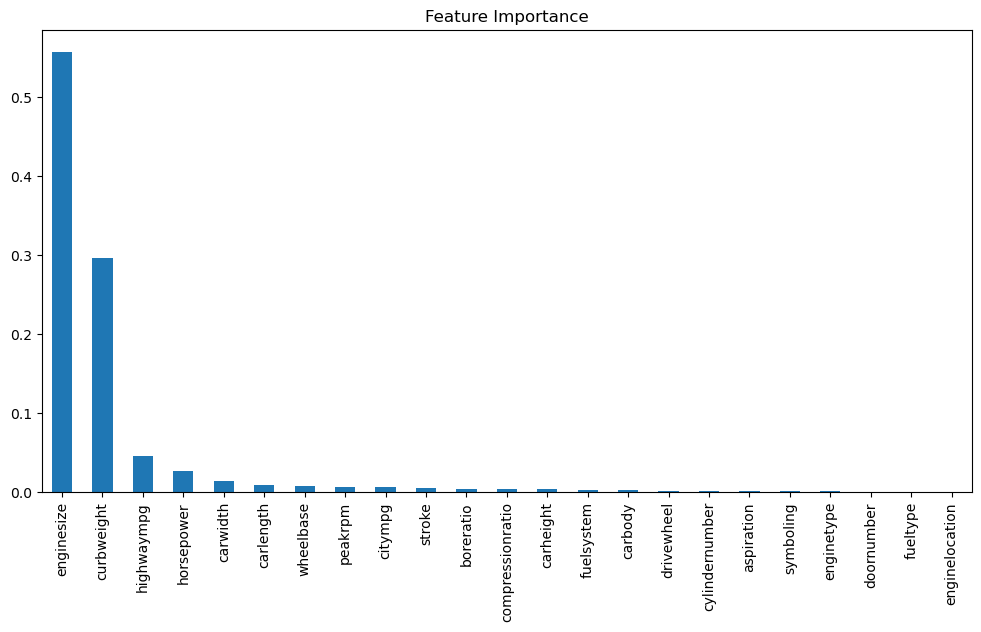

In [11]:
# 4. Feature Importance Analysis 

# For feature importance, use Random Forest (best model)
from sklearn.ensemble import RandomForestRegressor

best_model = RandomForestRegressor(random_state=42)
best_model.fit(X_train, y_train)

# Get feature importances
importances = best_model.feature_importances_
feat_importances = pd.Series(importances, index=X.columns)
feat_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12,6), title='Feature Importance')


In [13]:
# 5. Hyperparameter Tuning 


# Let's do tuning for Random Forest
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print('Best Parameters:', grid_search.best_params_)

# Evaluate the best model
best_rf = grid_search.best_estimator_
tuned_preds = best_rf.predict(X_test)

# Evaluation after tuning
r2 = r2_score(y_test, tuned_preds)
mse = mean_squared_error(y_test, tuned_preds)
mae = mean_absolute_error(y_test, tuned_preds)

print(f"Tuned Model Performance:\nR2 Score: {r2}\nMSE: {mse}\nMAE: {mae}")


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Model Performance:
R2 Score: 0.9592021379541419
MSE: 3220747.27319362
MAE: 1238.7195649851762
